## Figure4. Possible phase portraits in the case of $\epsilon <0$ and $\lambda >0$ near the fixed point $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$
- parameters of (a) (satisfy $B>0, A\pm\sqrt{B}<0$)

> $\alpha=0.1,\beta=0.01,\delta=0.02,\gamma=0.1,\epsilon=-4,\lambda=0.1$

- parameters of (b) (satisfy $B<0$)

> $\alpha=0.1,\beta=0.01,\delta=0.02,\gamma=0.1,\epsilon=-0.1,\lambda=0.1$ 

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from PIL import Image
import math

In [95]:
plt.rcParams["figure.figsize"] = (6,5)

In [96]:
np.seterr(divide='ignore', invalid='ignore') # avoiding invalid value encountered in true_divide

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [97]:
# 2 cases
# 1. B>0, A pm sqrt(B) < 0
# alpha = 0.1; beta = 0.01; 
# delta = 0.02; gam = 0.1;
# eps = -4; lamda = 0.1;

# 2. B<0
alpha = 0.1; beta = 0.01; 
delta = 0.02; gam = 0.1;
eps = -0.1; lamda = 0.1;

In [98]:
A = alpha*gam*(eps*delta - beta*lamda)
B = (alpha**2)*(gam**2)*(eps*delta - beta*lamda)**2 - 4*alpha*gam*beta*delta*(beta*delta - alpha*eps*gam*lamda)

print(A, '\n', B)
print(A+np.sqrt(B), '\n', A-np.sqrt(B))

-3.0000000000000008e-05 
 -1.5000000000000004e-09
nan 
 nan


In [99]:
# fixed point (we use third one)

# ini2 = [(beta+(eps*gam))/(eps*(delta+(alpha*lamda))), (alpha+delta)/(lamda*(beta+(eps*gam)))]
ini3 = [gam/delta, alpha/beta]

# print(ini2)
print(ini3)

[5.0, 10.0]


In [100]:
n_ini = 6

In [114]:
p0 = np.array([np.linspace(4,6, n_ini), np.linspace(9,11,n_ini)])  #case1
# p0 = np.array([np.linspace(3,7, n_ini), np.linspace(9,11,n_ini)])  #case2

In [115]:
p0

array([[ 4. ,  4.4,  4.8,  5.2,  5.6,  6. ],
       [ 9. ,  9.4,  9.8, 10.2, 10.6, 11. ]])

In [116]:
def modified_lotka(y, t=0):

    # 2 cases
    # # 1. B>0, A pm sqrt(B) < 0
#     alpha = 0.1; beta = 0.01; 
#     delta = 0.02; gam = 0.1;
#     eps = -4; lamda = 0.1;

    # # 2. B<0
    alpha = 0.1; beta = 0.01; 
    delta = 0.02; gam = 0.1;
    eps = -0.1; lamda = 0.1;
    
    return ([(alpha*y[0] - beta*y[0]*y[1] + eps*delta*(y[0]**2)*y[1] - eps*gam*y[0]*y[1])/(1-eps*lamda*y[0]*y[1]),
            (delta*y[0]*y[1] - gam*y[1] + alpha*lamda*y[0]*y[1] - beta*lamda*y[0]*(y[1]**2))/(1-eps*lamda*y[0]*y[1])])

In [117]:
# Open figure
f = plt.figure()
t = np.linspace(0, 50, 500)

# t = np.linspace(0, 150, 1000)

<Figure size 432x360 with 0 Axes>

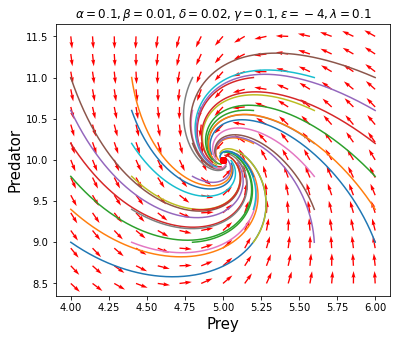

In [119]:
for i in range(n_ini):
    for j in range(n_ini):
        p = integrate.odeint(modified_lotka, [p0[0,i], p0[1,j]], t)
        plt.plot(p[:,0], p[:,1])
        plt.plot(ini3[0],ini3[1], 'ro')
#         plt.xlim([0,1.25])
#         plt.ylim([0,2.5])


# ymax = plt.ylim(ymin=0)[1]
# xmax = plt.xlim(xmin=0)[1]

nb_points = 15

x = np.linspace(4,6, nb_points)
y = np.linspace(8.5,11.5, nb_points)

X1 , Y1 = np.meshgrid(x,y)
DX1, DY1 = modified_lotka([X1, Y1])

# Direction at each grid point is the hypotenuse of the prey direction and the predator direction.
M = (np.hypot(DX1, DY1))
M[M == 0] = 1  # This is to avoid any divisions when normalizing

# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

plt.quiver(X1, Y1, DX1, DY1, color='red')


plt.xlabel("Prey", fontsize = 15)
plt.ylabel("Predator", fontsize = 15)
plt.title(r'$\alpha=0.1,\beta=0.01,\delta=0.02,\gamma=0.1,\epsilon=-4,\lambda=0.1$')  ## 1
# plt.title(r'$\alpha=0.1,\beta=0.01,\delta=0.02,\gamma=0.1,\epsilon=-0.1,\lambda=0.1$')  ## 2
plt.savefig('re_image/fig4-2.eps', format='eps')
plt.show()